In [1]:
import numpy as np
import pandas as pd

In [2]:
# Try reading the CSV file with different encodings
encodings_to_try = ['utf-8', 'latin-1', 'ISO-8859-1']

In [3]:
df= []
for encoding in encodings_to_try:
    try:
        df = pd.read_csv("spam.csv", encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break  # Stop trying encodings once successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")


Failed to read with encoding: utf-8
Successfully read the file with encoding: latin-1


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2990,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,NaN,NaN,NaN
3820,ham,You are right though. I can't give you the spa...,NaN,NaN,NaN
3637,spam,Customer service announcement. We recently tri...,NaN,NaN,NaN
3696,spam,You are a winner you have been specially selec...,NaN,NaN,NaN
468,ham,"Yup, no need. I'll jus wait 4 e rain 2 stop.",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop the last three columns
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.sample(5)

,v1,v2
851,ham,"I am real, baby! I want to bring out your inne..."
2053,ham,Oh... I was thkin of goin yogasana at 10 den n...
4972,ham,Oops I was in the shower when u called. Hey a ...
3123,ham,My uncles in Atlanta. Wish you guys a great se...
3323,ham,I don wake since. I checked that stuff and saw...


In [9]:
# rename the columns
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [10]:
df.sample(5)

,target,text
5431,ham,If I was I wasn't paying attention
791,ham,All e best 4 ur driving tmr :-)
3256,ham,"No, but you told me you were going, before you..."
3957,ham,So i could kiss and feel you next to me...
3441,spam,Save money on wedding lingerie at www.bridal.p...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# labeling the target column
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for the duplicate values
df.duplicated().sum()

403

In [16]:
# remove the duplicate values
df = df.drop_duplicates(keep="first")

In [17]:
df.shape

(5169, 2)

In [18]:
df.duplicated().sum()

0

## 2. EDA (Exploratory Data Analysis)

In [19]:
# checking how many are ham (0) and how many are spam (1)
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

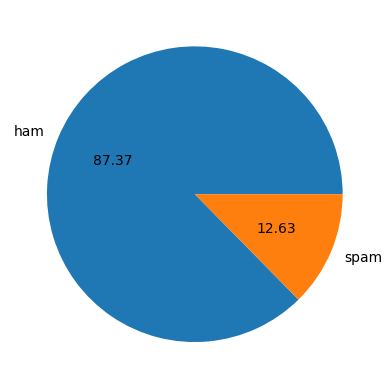

In [20]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f" )
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df["num_of_charactors"] = df["text"].apply(len)
df["num_of_charactors"]

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_of_charactors, Length: 5169, dtype: int64

In [24]:
df.head()

,target,text,num_of_charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# find the num of words
df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df["num_of_words"]

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_of_words, Length: 5169, dtype: int64

In [26]:
df.head()

,target,text,num_of_charactors,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# find the num of words
df["num_of_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df["num_of_sentences"]

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_of_sentences, Length: 5169, dtype: int64

In [28]:
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# applying describe function on num of characters , words and sentences
df[["num_of_charactors","num_of_words","num_of_sentences"]].describe()

,num_of_charactors,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df["target"]== 0][["num_of_charactors","num_of_words","num_of_sentences"]].describe()

,num_of_charactors,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df["target"]== 1][["num_of_charactors","num_of_words","num_of_sentences"]].describe()

,num_of_charactors,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
# we can see that the spam messages are commonly longer than ham

In [33]:
import seaborn as sns

<Axes: xlabel='num_of_charactors', ylabel='Count'>

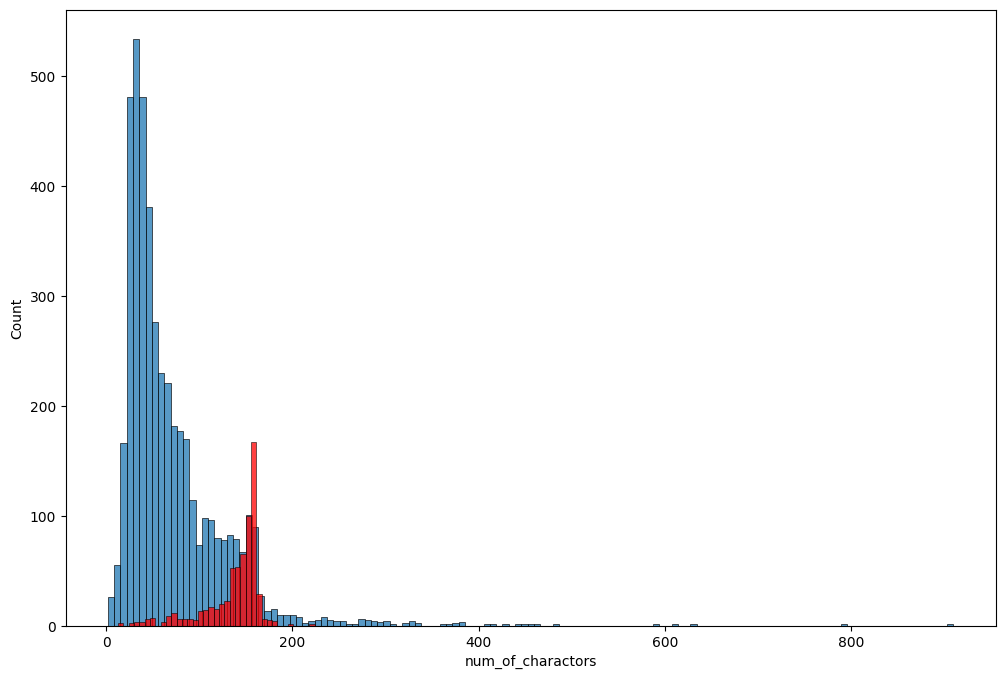

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_of_charactors"])
sns.histplot(df[df["target"] == 1]["num_of_charactors"], color="red")

<Axes: xlabel='num_of_words', ylabel='Count'>

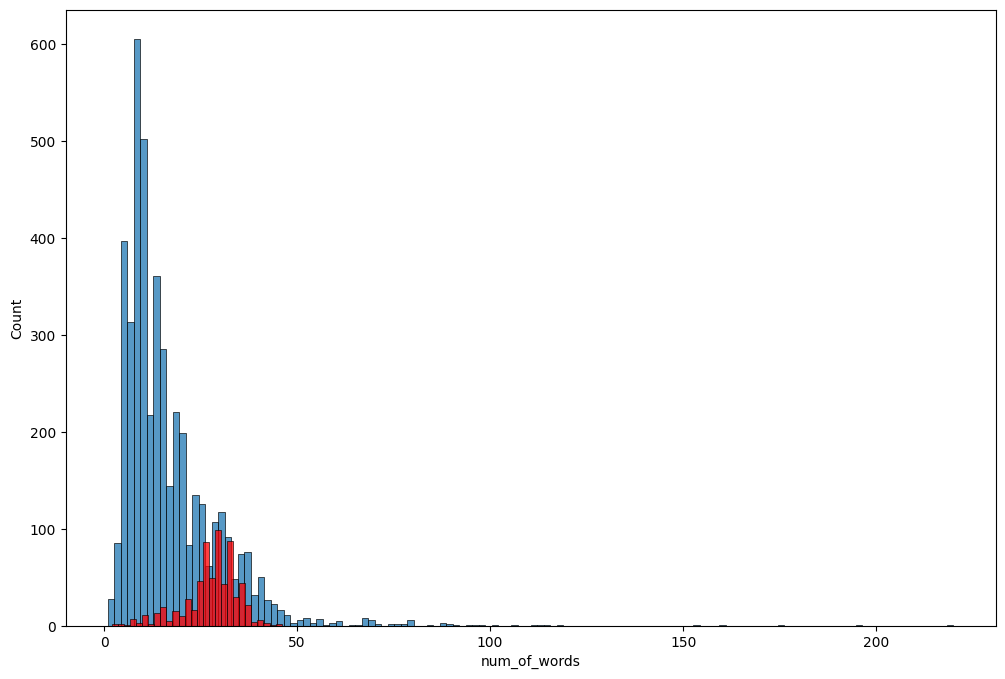

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_of_words"])
sns.histplot(df[df["target"] == 1]["num_of_words"], color="red")

<Axes: xlabel='num_of_sentences', ylabel='Count'>

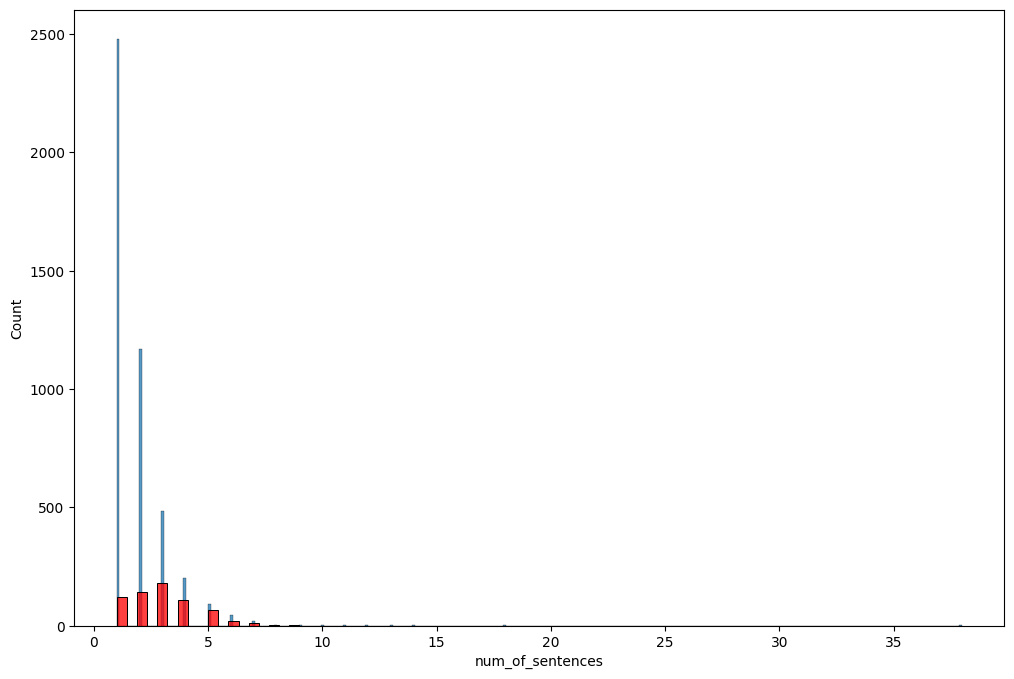

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_of_sentences"])
sns.histplot(df[df["target"] == 1]["num_of_sentences"], color="red")

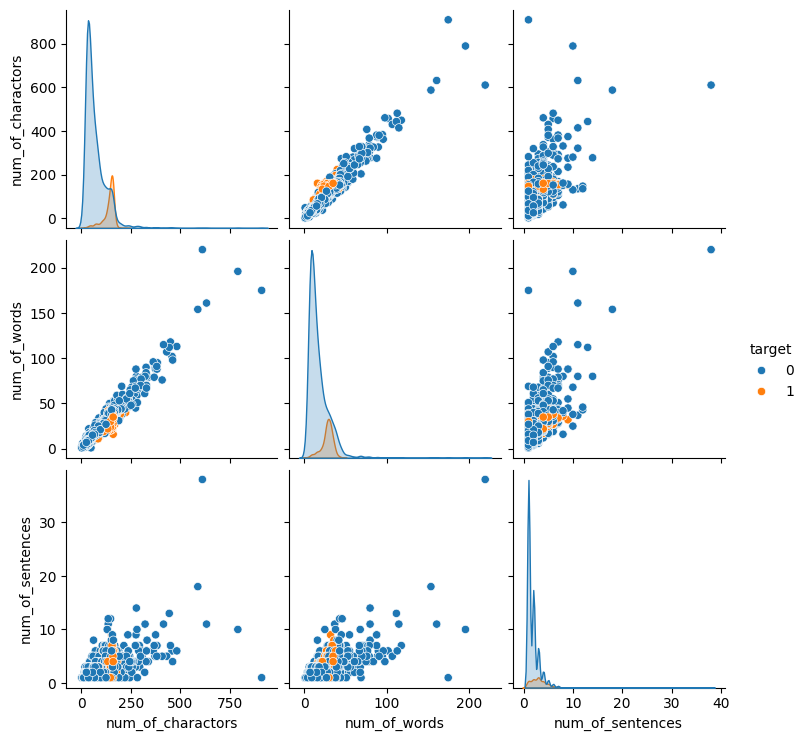

In [37]:
sns.pairplot(df, hue="target")
plt.show()

<Axes: >

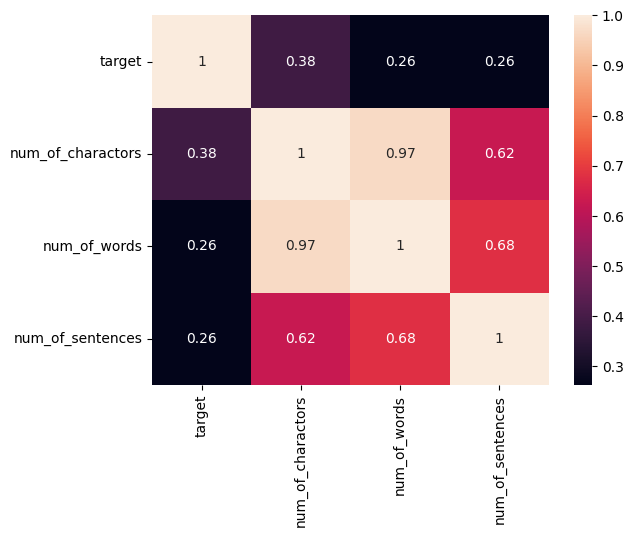

In [38]:
sns.heatmap(df.drop("text", axis=1).corr(), annot= True)

## 3. Data Preprocessing:
    . Lower case
    . tokenziation
    . Remove punctuations and stop words
    . removing special charaters
    .  stemming

In [39]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download("stopwords")
def transform_text(text):
    # Lower case
    text = text.lower()

    # tokenziation
    text = nltk.word_tokenize(text)

    # Removing special charaters
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    # cloning
    text = y[:]
    y.clear()

    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
    
    text = y[:]
    y.clear()

    for word in text:
        y.append(ps.stem(word))

    text = y[:]

    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
transform_text("hi i am Bilal what's your name brother? underestimating")

'hi bilal name brother underestim'

In [41]:
df["transformed_text"] = df["text"].apply(transform_text)

In [42]:
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=750, height=750, background_color="white", min_font_size=10)

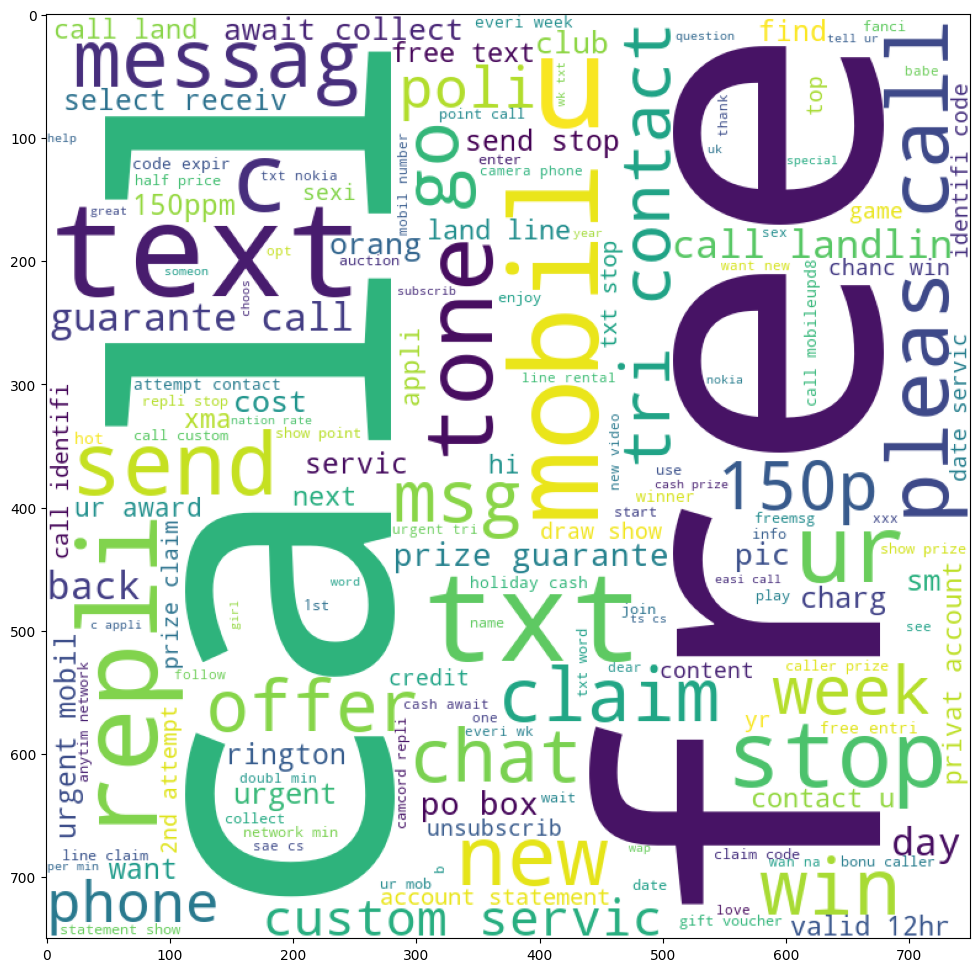

In [44]:
# make word cloud for spam messages
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(16,12))
plt.imshow(spam_wc)


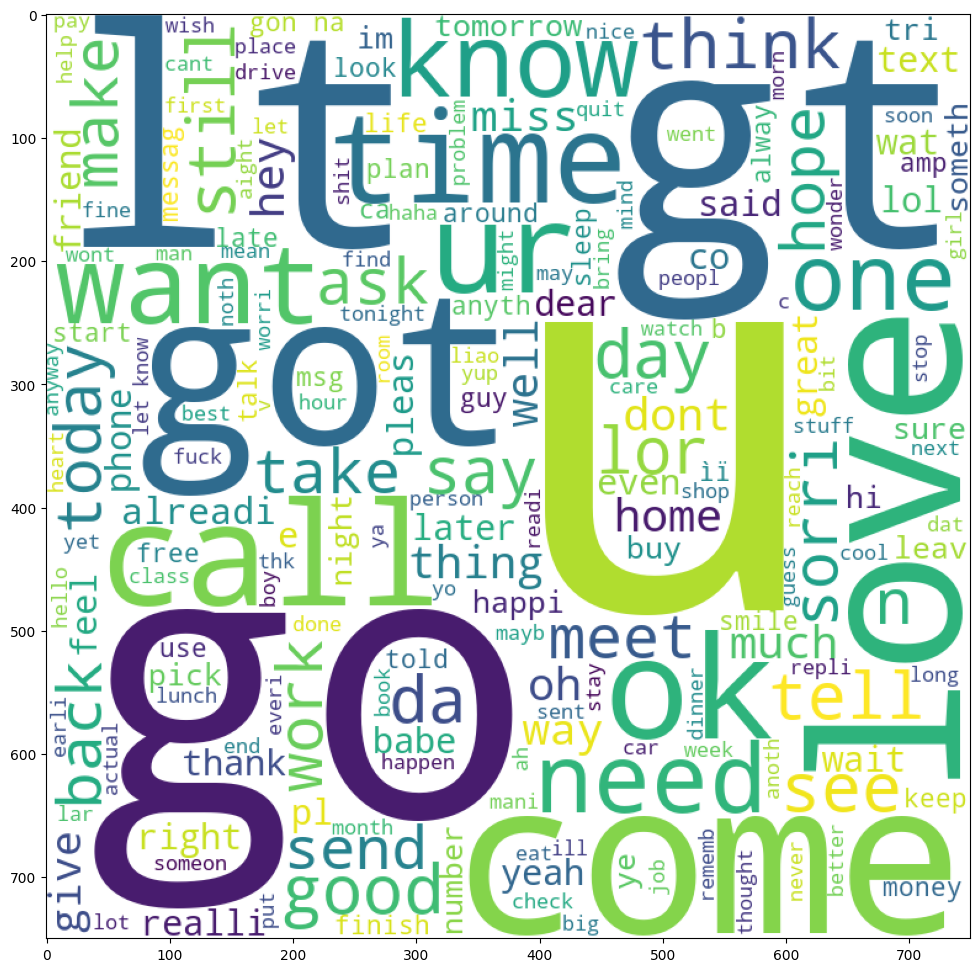

In [45]:
# make word cloud for ham messages
spam_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(16,12))
plt.imshow(spam_wc)

In [46]:
# for spam
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)


9939

In [47]:
from collections import Counter

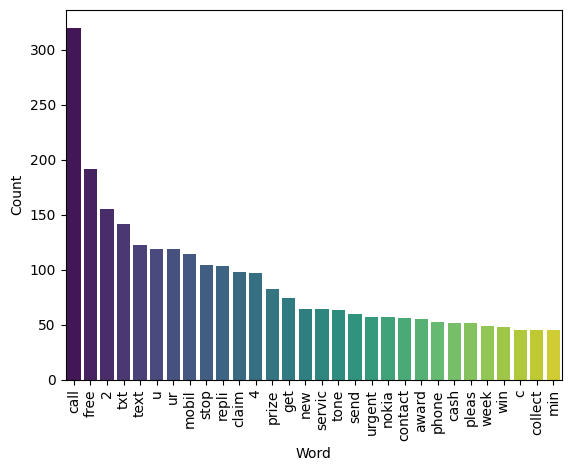

In [48]:
common_words = Counter(spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', hue='Word', data=df_common_words, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [49]:
# for ham 
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)


35404

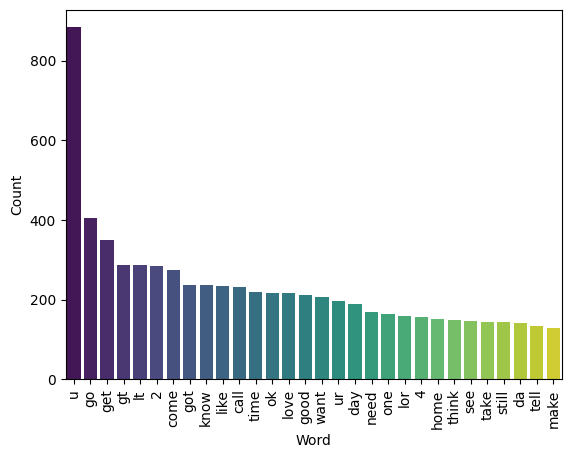

In [50]:
common_words = Counter(ham_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', hue='Word', data=df_common_words, palette='viridis')
plt.xticks(rotation=90)
plt.show()